In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = ['Species'])
df = pd.concat([X, y], axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
TSNE_model = TSNE(n_components = 2)
TSNE_result = TSNE_model.fit_transform(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

C:\Users\bl4an\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\bl4an\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [4]:
plt_result = pd.concat([pd.DataFrame(TSNE_result, columns = ['feature1', 'feature2']), y], axis = 1)
plt_result.head()

,feature1,feature2,Species
0,-12.832151,21.232988,0
1,-12.113032,18.570932,0
2,-13.260026,18.824526,0
3,-12.916179,18.345194,0
4,-13.248346,21.259310,0


C:\Users\bl4an\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


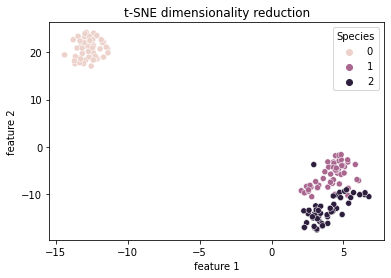

In [5]:
sns.scatterplot(plt_result['feature1'], plt_result['feature2'], hue = plt_result['Species'])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('t-SNE dimensionality reduction')
plt.show()

In [6]:
model = KMeans(n_clusters = 3)
pred = model.fit_predict(X)

C:\Users\bl4an\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


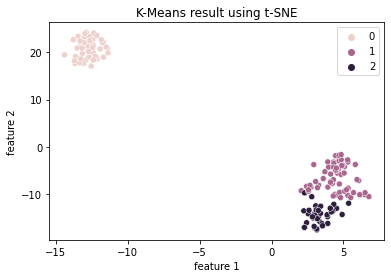

In [9]:
sns.scatterplot(plt_result['feature1'], plt_result['feature2'], hue = pred)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('K-Means result using t-SNE')
plt.show()